### Importing Libraries

In [83]:
import numpy as np
from sklearn.tree import plot_tree
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#print(plt.style.available)

&nbsp;

&nbsp;

### Sample Data

In [84]:
X = np.array([[-1, -2], [-3, -3], [-3, -4], [0, 0], [-50, 60]])

&nbsp;

&nbsp;

### Visualizing Sample Data

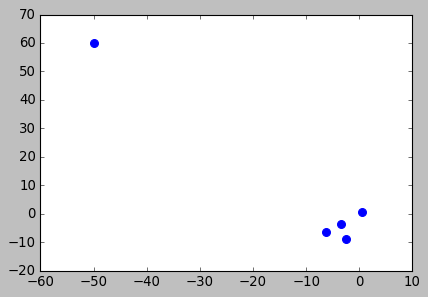

In [112]:
plt.style.use('_classic_test') 

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,4))

axes.scatter(-3.5, -3.5,marker='o',color='blue',s=50)
axes.scatter(-6.2, -6.5,marker='o',color='blue',s=50)
axes.scatter(-2.5, -8.8,marker='o',color='blue',s=50)
axes.scatter(0.5, 0.5,marker='o',color='blue',s=50)
axes.scatter(-50, 60,marker='o',color='blue',s=50)

&nbsp;

&nbsp;

### Model Fit

In [121]:
model = IsolationForest(n_estimators = 2)
model.fit(X)

IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=2,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

&nbsp;

&nbsp;

### Model Estimators

In [123]:
model.estimators_

[ExtraTreeRegressor(criterion='mse', max_depth=3, max_features=1,
                    max_leaf_nodes=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    random_state=9246285, splitter='random'),
 ExtraTreeRegressor(criterion='mse', max_depth=3, max_features=1,
                    max_leaf_nodes=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    random_state=603733169, splitter='random')]

&nbsp;

&nbsp;

&nbsp;

### Model Random Sample per each Estimator

In [125]:
model.estimators_samples_

[array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4])]

&nbsp;

&nbsp;

### Model Predictions(Anomaly data point labelled as '-1' & normal data point as '1')

In [115]:
model.predict(X)

array([ 1,  1,  1,  1, -1])

&nbsp;

&nbsp;

### Model Anomaly Score(Using Decision Function, writes Avg. random forest trees split path distance for data point isolation)

In [126]:
model.decision_function(X)

array([ 0.09082284,  0.14744251,  0.14744251,  0.02511022, -0.24239857])

#### Key Point:
* Lower the Avg. random forest trees split path value for Anomaly data point isolation(i.e., using less splits anomaly data point can be splitted for isolation, because of not having nearest neighbour data points to it).
* Higher the Avg. random forest trees split path value for Normal data point isolation(i.e., We require more splits for anomaly data point isolation, because of having nearest neighbour data points to it).
* [-50, 60] labelled as '-1' & given very less anomaly score i.e., -0.24239857, beacuse it is very far from normal data points, hence easily splitted for isolation. So it is anomaly data point.

&nbsp;

&nbsp;

### Ploting 1st Decision tree out of 2 estimators

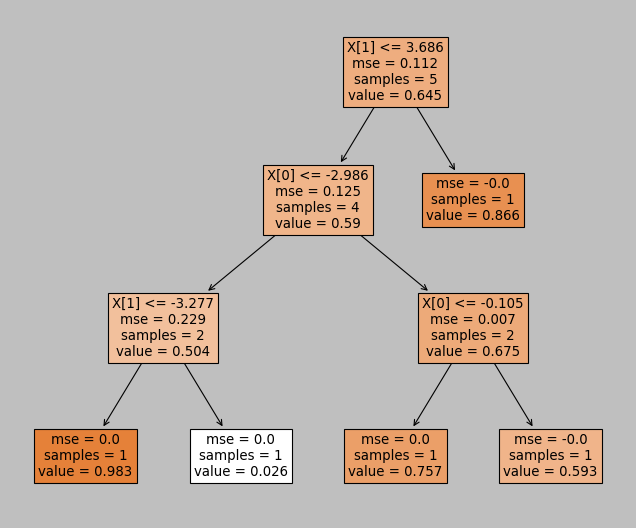

In [117]:
fig = plt.figure(figsize=(10,8))
a = plot_tree(OUTDClf.estimators_[0], fontsize=12, filled=True)
plt.show()

&nbsp;

### Ploting 2nd Decision tree out of 2 estimators

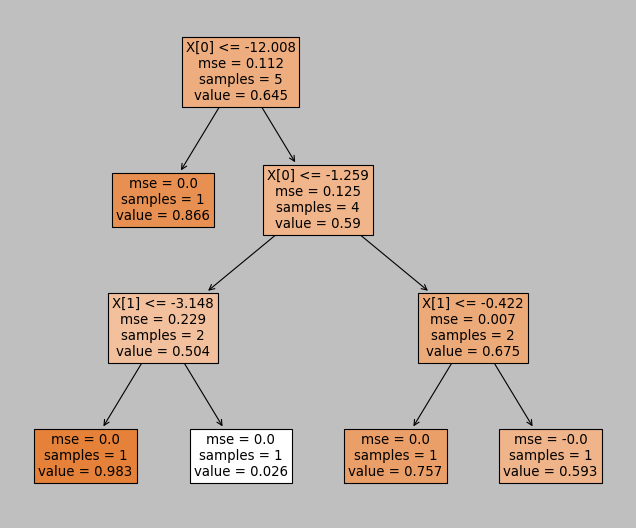

In [120]:
fig = plt.figure(figsize=(10,8))
a = plot_tree(OUTDClf.estimators_[1], fontsize=12, filled=True)
plt.show()

#### Key Point:
* Above are two Decision Trees, which are used in Isolation Forest as Estimators.
* We can't interprete these tress exactly as in Decision Tree/Random Forest. Because here splitting is not based on Information Gain, it is based on totally randomly values of features within their min/max values.
* We need to notice only node which near to root node are mostly anomaly. 
i.e., In 1st estimator X[1] <= 3.686, data point not satisfying this condition (False).i.e., Then right node ->samples = 1(this is our anomaly data point, which got isolated only with one split, so its have avg.random forest split path distance i.e., anomaly score will be low)
i.e., In second estimator X[0] <= -12.008, data point satisfying this condition (True).i.e., Then left node ->samples = 1(this is our anomaly data point, which got isolated only with one split, so its have avg.random forest split path distance i.e., anomaly score will be low)

* As per my understanding in this trees there is nothing related to white/orange colors with anomaly/non-anomaly data points labelling.
* Need to analyse more on this in further examples.

&nbsp;

&nbsp;

### <b><span style='background:yellow'> Take Away Points :</span></b>

* Previously, I have used anomaly detection using statistical test i.e., 3standdev but it requires data to follow normal distribution and it works only on single dimension data, like stated in limitation of statistical tests for anomaly detection. “
* But Isolation Forest is like random splitting using random values(like Random forest), getting shorter splits for anomaly observation isolation(means not having many neighbour points near to it) & higher splits for normal observation isolation. 
* Here, splits can be considered as decision trees where, isolating data point has shorter path/splits for mostly likely in anomaly data point. 
* Average across random forest split paths distance considered as anomaly score, which we get from decision function in Isolation Forest. 
* Note : Shorter the decision function value highly the chance of anomaly data point. 
